## Task: Car Price Prediction  

## Importing Necessary Libraries

In [81]:
!pip install -q ydata_profiling

In [82]:
import warnings as warn
warn.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Data Cleaning

In [83]:
df = pd.read_csv('/content/car data.csv')

In [84]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [85]:
df.shape

(301, 9)

In [86]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [88]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [89]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

## Data Preprocessing

In [90]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [91]:
df.drop('Car_Name',axis=1,inplace=True)

In [92]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [93]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [94]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [95]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [96]:
df.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [97]:
label_enc = LabelEncoder()

In [98]:
df['Selling_type'] = label_enc.fit_transform(df['Selling_type'])
df['Fuel_Type'] = label_enc.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_enc.fit_transform(df['Transmission'])

In [99]:
df.drop('Year',axis=1,inplace=True)

In [100]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,3.35,5.59,27000,2,0,1,0
1,4.75,9.54,43000,1,0,1,0
2,7.25,9.85,6900,2,0,1,0
3,2.85,4.15,5200,2,0,1,0
4,4.60,6.87,42450,1,0,1,0


## Exploratory Data Analysis

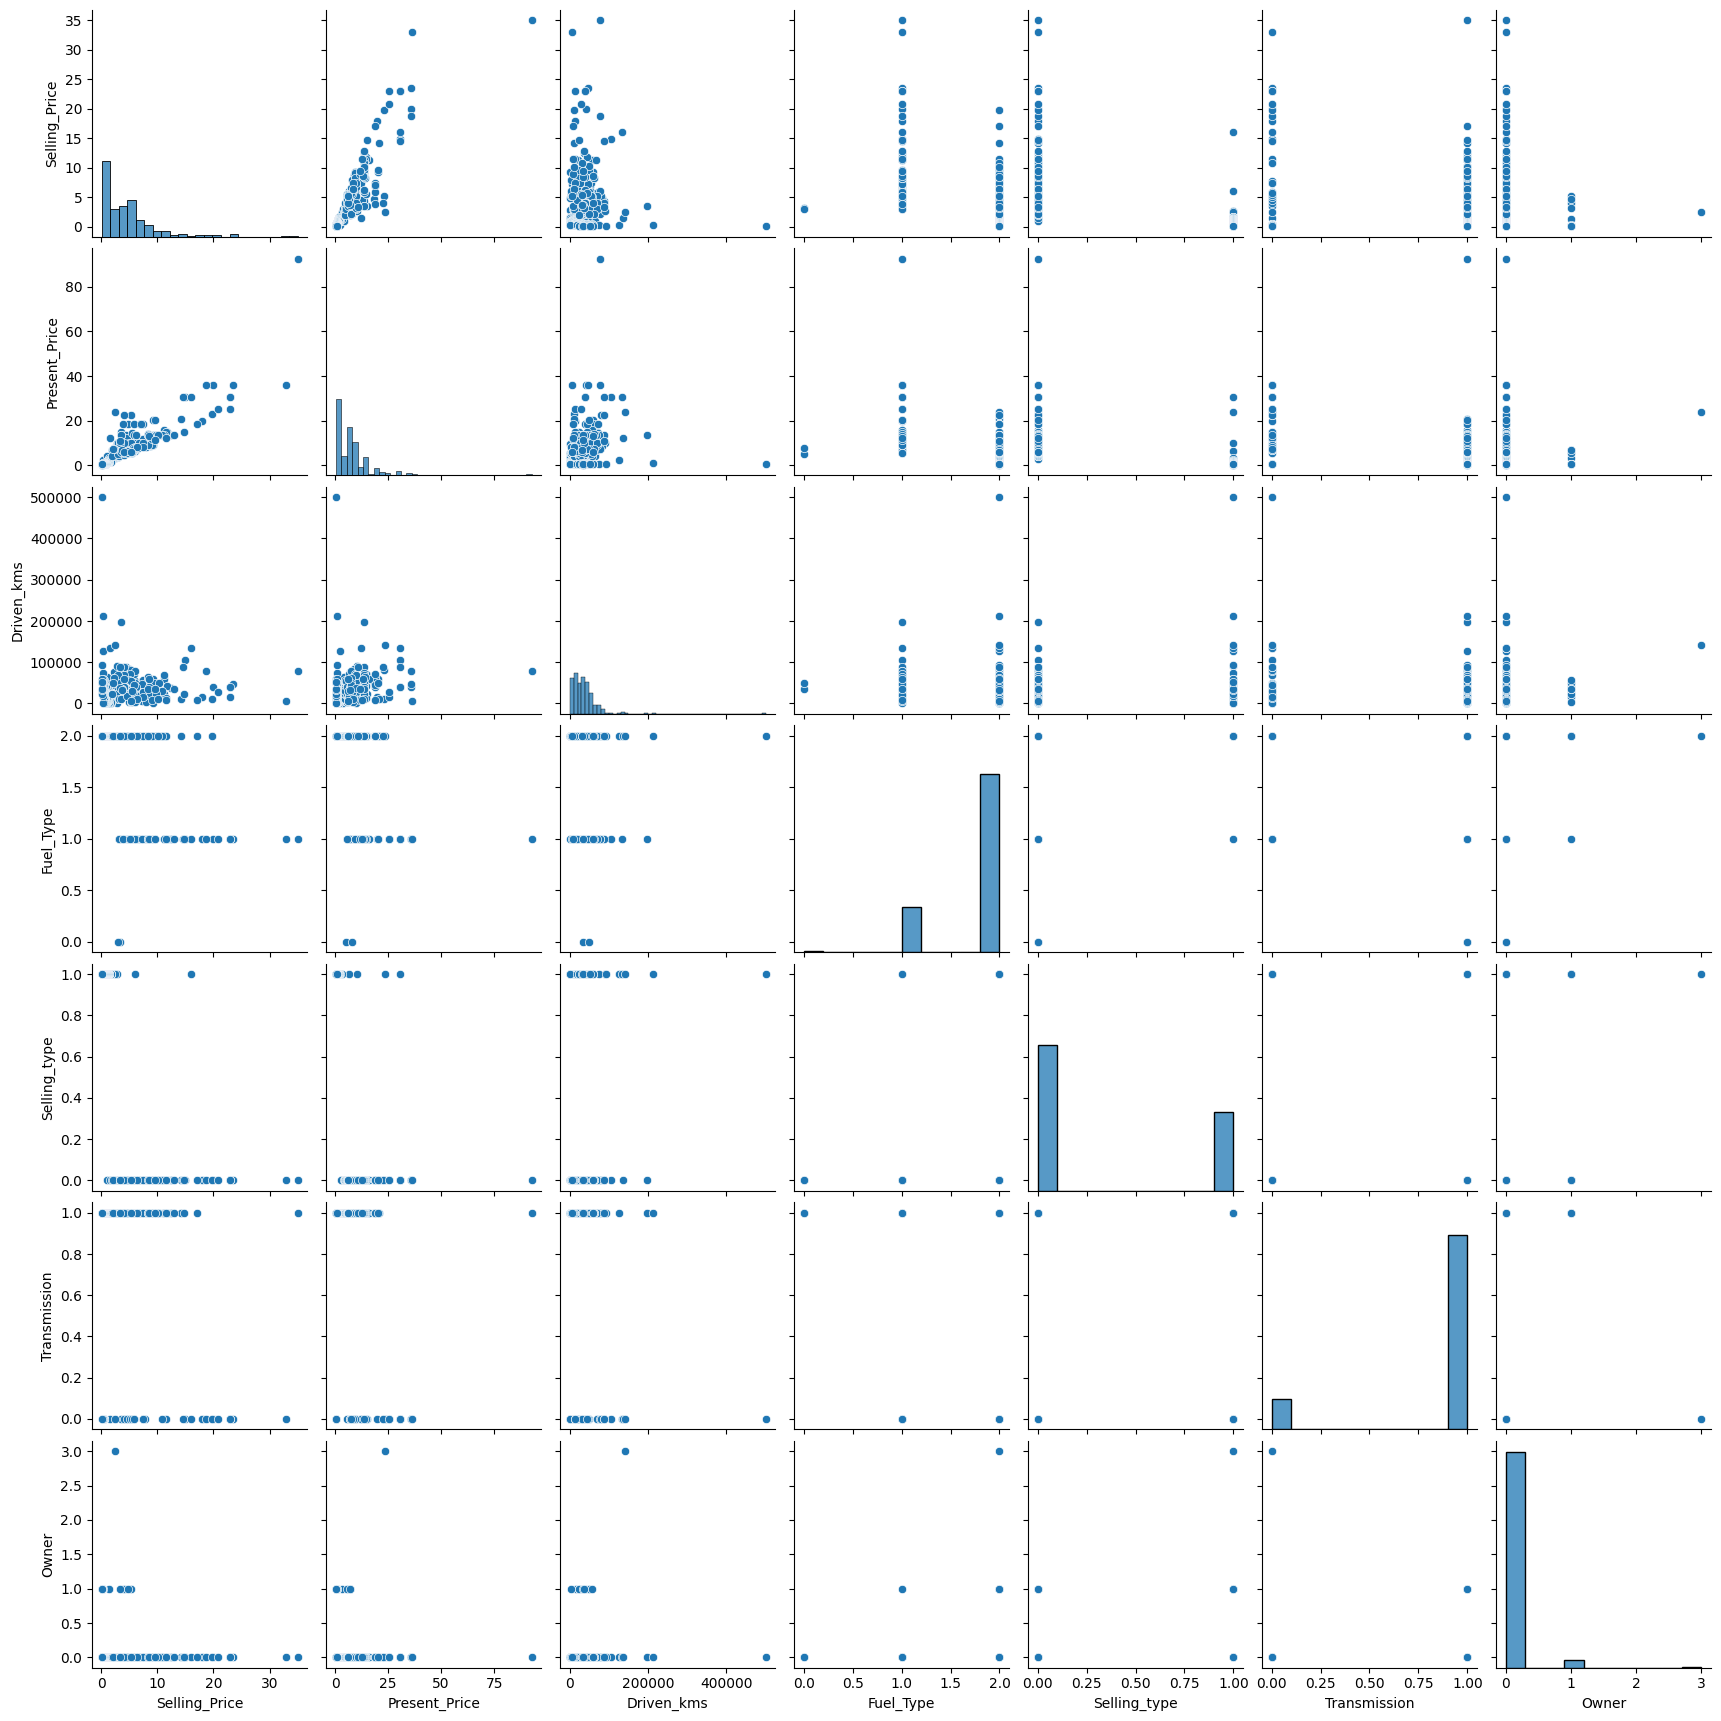

In [101]:
sns.pairplot(df)
plt.show()

<Axes: >

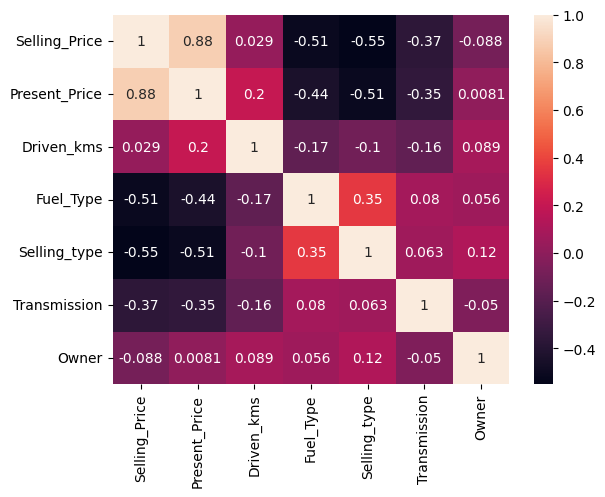

In [102]:
sns.heatmap(df.corr(),annot=True)

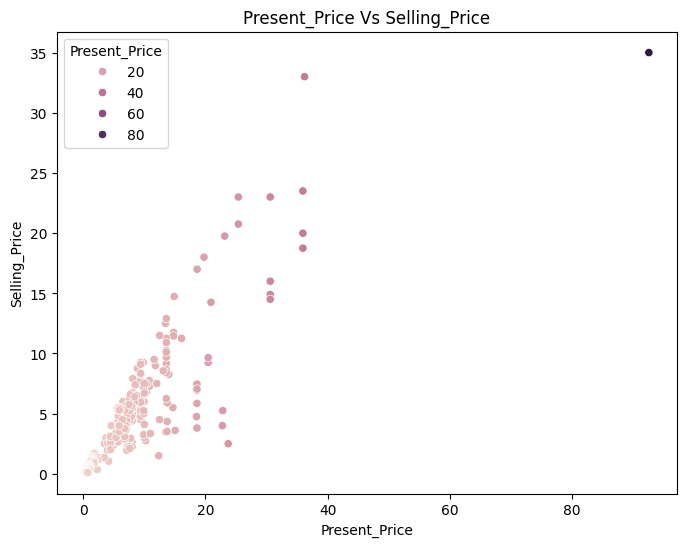

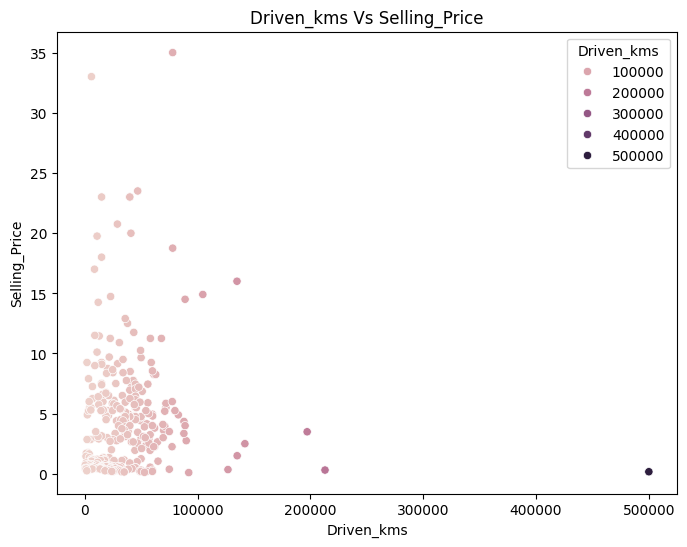

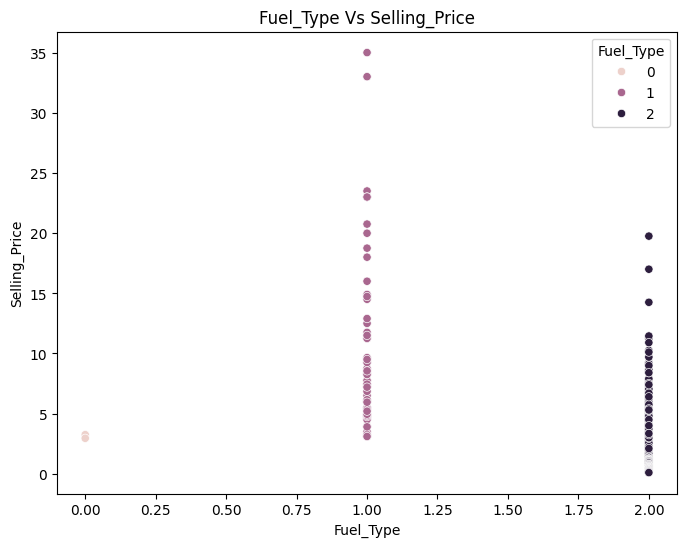

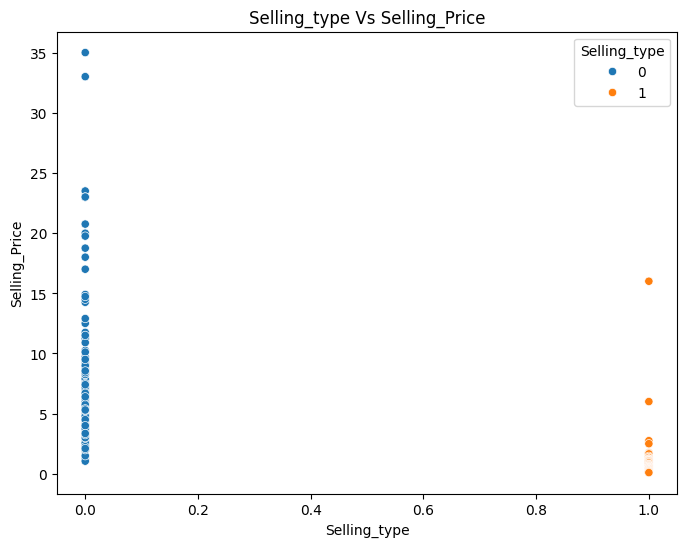

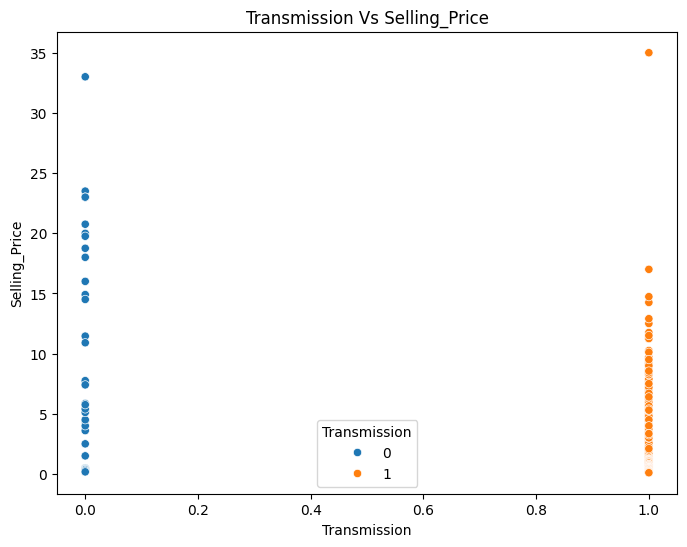

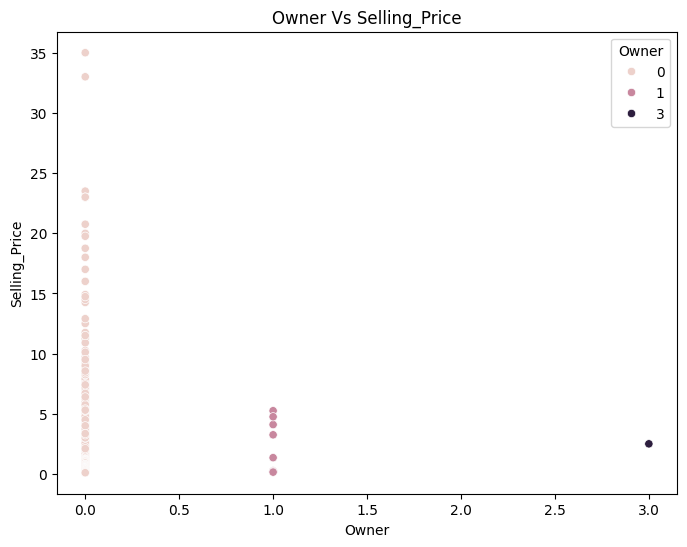

In [103]:
for col in df.columns:
  if col != 'Selling_Price':
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Selling_Price', hue=col, data=df)
    plt.title(f'{col} Vs Selling_Price')
    plt.show()

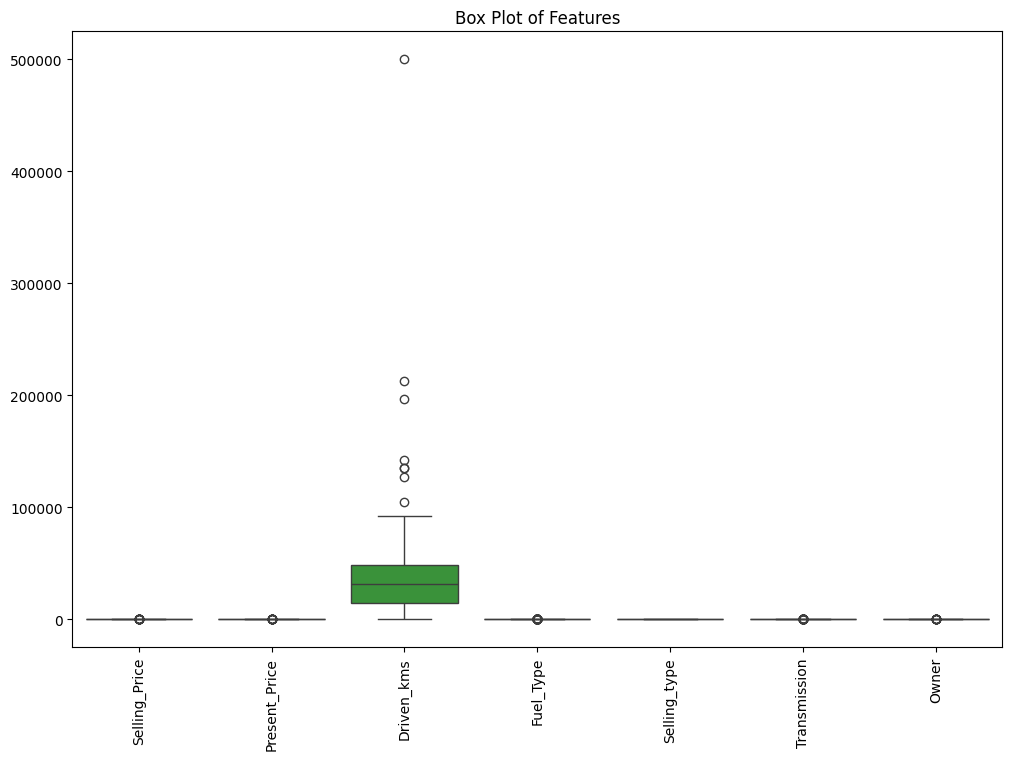

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

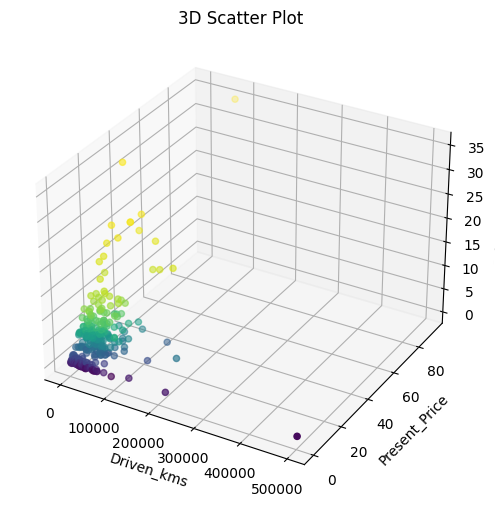

In [105]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Driven_kms'], df['Present_Price'], df['Selling_Price'],
                     c=df['Selling_Price'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Driven_kms')
ax.set_ylabel('Present_Price')
ax.set_zlabel('Selling_Price')
plt.title('3D Scatter Plot')
plt.show()


In [106]:
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Building

In [107]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [108]:
def adjusted_r2_score(y_test,y_pred,n,p):
  return 1 - (((1-r2_score(y_test,y_pred))*(n-1))/(n-p-1))


### Modelling With LinearRegression


In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [110]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [111]:
r2_score(y_test,y_pred)

0.825105857810319

In [112]:
mean_absolute_error(y_test,y_pred)

1.4077868100786035

In [113]:
mean_squared_error(y_test,y_pred)

4.805094760574654

In [114]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.192052636360417

In [115]:
adjusted_r2_score(y_test,y_pred,len(y_test),df.shape[0])

1.0580400914346286

### Modelling With RandomForestRegressor


In [116]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [117]:
r2_score(y_test,y_pred)

0.9398142315598068

In [118]:
mean_absolute_error(y_test,y_pred)

0.8088404605263154

In [119]:
mean_squared_error(y_test,y_pred)

1.6535620745918542

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.2859090460028089

In [121]:
adjusted_r2_score(y_test,y_pred,len(y_test),df.shape[0])

1.0199731532434269